In [ ]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
# importing the dataset
df= pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# we drop the first three unnecessary columns
# this is a pandas df. we use '.values' to convert pandas df into numpy df
x = df.iloc[:,3:13].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# we store the last column - 'Exited' - as y variable.
y = df.iloc[:,13]

In [ ]:
# we encode categorical values in the third column - 'Gender' - into numerical values (1 for male and 0 for female)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,2]= labelencoder.fit_transform(x[:,2])
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# we now perform one-hot encoding on categorical column - 'Country' - creating new binary columns for each unique category while leaving the rest of the data unchanged.
from  sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(),[1])], remainder = 'passthrough')
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# we restore the data structure into a more readable format by creating a DataFrame with clear, meaningful column names
x = pd.DataFrame(x, columns = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"])
x

,X1,X2,X3,Credit Score,Gender,Age,Tenure,Balance,NumofProducts,HasCrCard,IsActive Member,Estimated Salary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
# we drop 'X1' to correct for multicollinearity
x.drop(columns="X1",inplace = True)

In [ ]:
# we split the data into train (80%) and test (20%) data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
# to normalize the data, ensuring that each feature contributes equally to the model, we use Feature Scaling.
# we standardize the data using the Standardscaler which standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
# in the above, 'fit' calculates the mean and variance of each feature in the training data, and 'transform' standardizes each feature using these statistics.
x_test = sc.transform(x_test)
# in the above, we don't use 'fit'. this uses the mean and variance computed from x_train (to avoid data leakage) and transforms x_test using the same scaling parameters, ensuring consistency between training and testing data.

In [ ]:
# We now build a DNN (Deep Neural Network) with an input layer (11 features), two hidden layers with ReLU activation, and an output layer with a sigmoid activation function.
# This uses binary cross-entropy as the loss function and trains the model on the training data, making it suitable for binary classification tasks.

import keras
from keras.models import Sequential                                             # using 'Sequential' as in Keras, it allows stacking layers linearly in a sequence.
from keras.layers import Dense                                                  # using 'Dense' as it's a fully connected layer where each neuron in a layer is connected to every neuron in the previous layer.
# Initialising the Deep Learning Model
classifier = Sequential()

# First Hidden Layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))       # The first hidden layer has 6 neurons, weights are taken randomly from a uniform distribution and activation is ReLU to introduce non-linearity, and input layer dimension has 11 features.

# Second Hidden Layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))                     # The secoond hidden layer again has 6 neurons, weights with uniform distribution, and ReLU activation.

# Output Layer
# Here the activation function is 'Sigmoid' as it is a binary classification problem
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))                  # Set neuron to 1, using Sigmoid to produce a probability output between 0 and 1 as suitable for binary classification.

# Compiling the DNN (Deep Neural Network)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the DNN to the Training Set : Processing 10 samples at a time before updating weights and training the model over 100 iterations through the dataset.
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7913 - loss: 0.5617
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.4230
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7982 - loss: 0.4204
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8206 - loss: 0.4241
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8259 - loss: 0.4236
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8382 - loss: 0.4131
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8301 - loss: 0.4110
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8375 - loss: 0.3981
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8303 - loss: 0.4091
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8397 - loss: 0.3972
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8378 - loss: 0.4062
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

**NOTE:**

Accuracy of the model is oscillating!

In [ ]:
# We now evaluate the model's accuracy at various probability thresholds.
# We can thus, choose the best cutoff for optimal accuracy.

from sklearn import metrics
i = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
accuracy = []
for cutoff in i:
  y_pred = (classifier.predict(x_test) > cutoff) #compare each element of the array with the cutoff
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

accuracy

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


[0.365,
 0.5445,
 0.6575,
 0.736,
 0.785,
 0.815,
 0.8255,
 0.8405,
 0.8465,
 0.8415,
 0.8385,
 0.834,
 0.829,
 0.822,
 0.815,
 0.8125,
 0.807,
 0.7975,
 0.7975]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8465


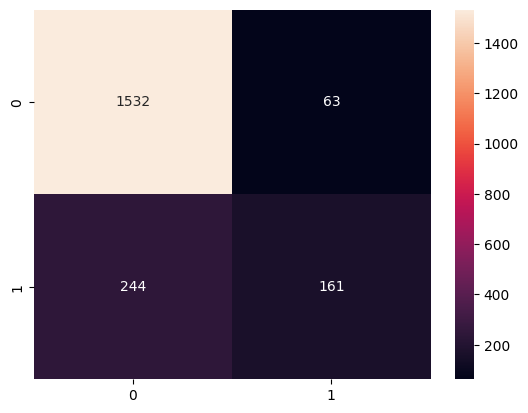

In [ ]:
# making the confusion matrix to show model performance across true and predicted classes.
# we adjust the cutoff threshold accordingly which helps customize the balance between false positives and false negatives.

import seaborn as sns
from sklearn import metrics
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.45)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');

#**EXAMPLE:**

**Objective:** Predicting the class of a customer who is visiting the bank for the first time.

Following are the customer details:


* Geography : France (0,0)
* Credit Score : 600
* Gender : Male (1)
* Age : 40 yrs
* Tenure : 3 years
* Balance : $60000

* Number of Products : 2
* Does this customer have a credit card? Yes (1)
* Is this customer an Active Member? Yes (1)
* Estimated Salary : $50000



In [ ]:
new_customer = classifier.predict(sc.transform(np.array([[0,0,600,1,40,3,60000,2,1,1,50000]])))

print("Probability of new customer:", new_customer)
new_prediction = (new_customer>0.45)
new_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probability of new customer: [[0.09241422]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[False]])

**The result shows the following:**

**1.   Prediction Probability:**
* _**"Probability of new customer: [[0.09241422]]"**_ indicates that the model predicted a probability of about 0.092 (or 9.24%) for the new customer belonging to the positive class.
* This low probability (significantly below 0.45) suggests the model considers it unlikely that the customer falls into the positive class.

**2.   Binary Classification:**
* _**"array([[False]])"**_ is the binary classification result based on the 0.45 threshold.
* Since 0.092 < 0.45, the output is False, indicating the model predicts that the new customer does not belong to the positive class.


*(Note: The "UserWarning" message does not impact the prediction and thus, can be ignored!)*

***Therefore, based on the model’s threshold, the new customer is classified as not belonging to the positive class (as supported by the probability of 0.092).***

